# semseg/train

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from abcli.plugins import cache
from roofAI import NAME, VERSION
from roofAI.semseg.interface import train
from roofAI.semseg import Profile
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
roofAI-3.120.1.abcli-7.2384.1-2023-06-aws-batch-a, built on 21 October 2023, 20:38:14


In [2]:
dataset_source = "CamVid" # AIRS
suffix = "v1"
profile = Profile.QUICK # FULL, QUICK, VALIDATION

In [3]:
model_object = objects.unique_object(f"roofAI-CamVid-{dataset_source}-model")

📂 roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554


RoofAIDataset[kind:DatasetKind.CAMVID,source:CamVid](roofAI_ingest_CamVid_2023-10-15-15-56-03-26635): 3 subset(s): 233 X test + 367 X train + 101 X val - 12 class(es): sky, building, pole, road, pavement, tree, signsymbol, fence, car, pedestrian, bicyclist, unlabelled
SemSegModelTrainer: /Users/kamangir/storage/abcli/roofAI_ingest_CamVid_2023-10-15-15-56-03-26635/SegNet-Tutorial/CamVid/ -Profile.QUICK-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554


Dataset: 20 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/dataset.png


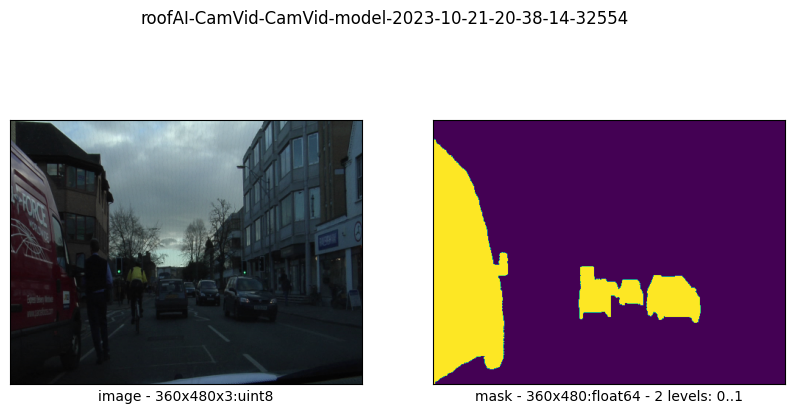

/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/alb

Dataset: 20 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/augmented_dataset-00000.png


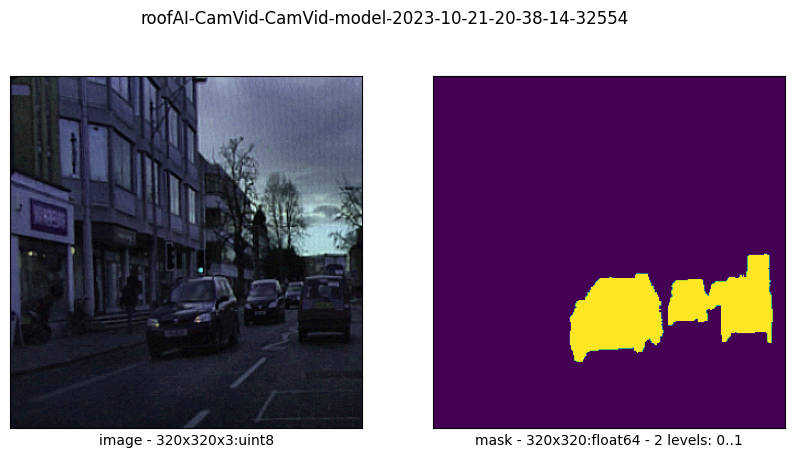

-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/augmented_dataset-00001.png


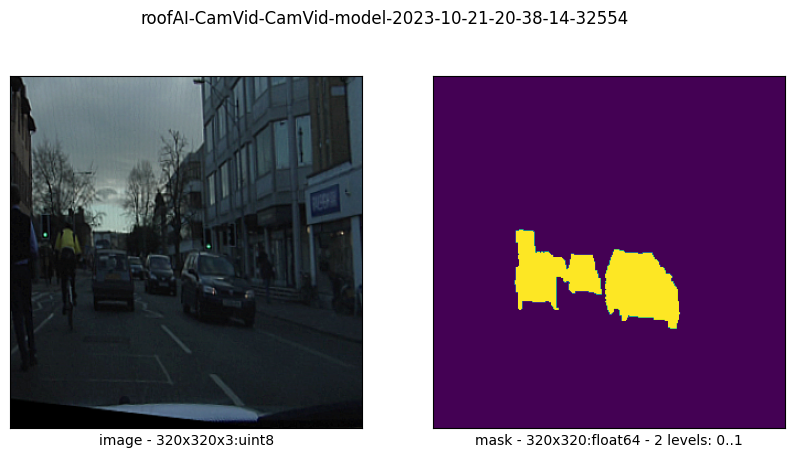

-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/augmented_dataset-00002.png


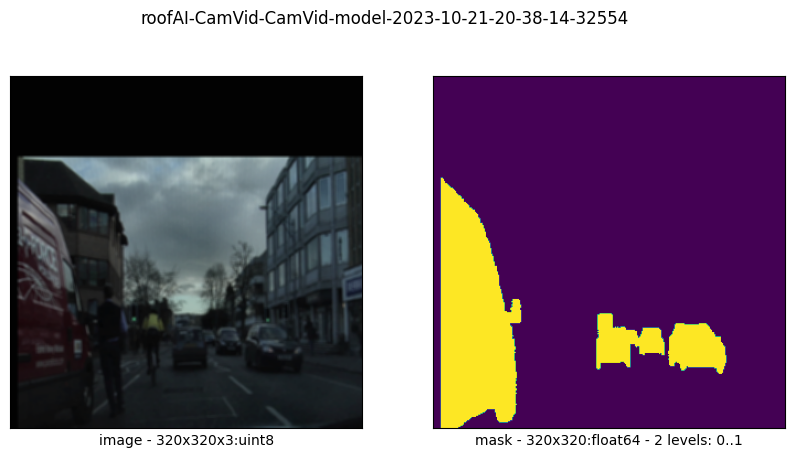

SemSegModelTrainer.train[v1] -cpu:sigmoid-> se_resnext50_32x4d[imagenet]: car
epoch: #1/5


Dataset: 20 item(s).
Dataset: 20 item(s).
valid: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s, dice_loss - 0.9389, iou_score - 0.04291] 


-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/model.pth
epoch: #2/5


valid: 100%|██████████| 20/20 [00:15<00:00,  1.33it/s, dice_loss - 0.8054, iou_score - 0.1888]  

-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/model.pth
epoch: #3/5



valid: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s, dice_loss - 0.659, iou_score - 0.2783]   


-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/model.pth
epoch: #4/5


valid: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s, dice_loss - 0.6306, iou_score - 0.283]   

-> /Users/kamangir/storage/abcli/roofAI-CamVid-CamVid-model-2023-10-21-20-38-14-32554/model.pth


epoch: #5/5


train:  33%|███▎      | 1/3 [00:10<00:20, 10.05s/it, dice_loss - 0.4597, iou_score - 0.38]

In [4]:
train(
    dataset_path=objects.object_path(cache.read(f"roofAI_ingest_{dataset_source}_v1")),
    model_path=objects.object_path(model_object),
    in_notebook=True,
    profile=profile,
    register=profile != Profile.VALIDATION,
    suffix=suffix,
);

In [ ]:
# END